# Explore here

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt



| Label | Clase                       |
|-------|-----------------------------|
| 0     | avión (airplane) ✈️         |
| 1     | automóvil (automobile) 🚗    |
| 2     | pájaro (bird) 🐦             |
| 3     | gato (cat) 🐱                |
| 4     | ciervo (deer) 🦌             |
| 5     | perro (dog) 🐶               |
| 6     | rana (frog) 🐸               |
| 7     | caballo (horse) 🐴           |
| 8     | barco (ship) 🚢              |
| 9     | camión (truck) 🚚            |


In [8]:
# Paso 1: Cargar CIFAR-10 y filtrar gatos (label 3) y perros (label 5)
(X_train_full, y_train_full), (X_test_full, y_test_full) = tf.keras.datasets.cifar10.load_data()

In [9]:
# Aplanamos las etiquetas para trabajar fácilmente
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

In [10]:
# Filtramos solo pajaros (2) y aiones (0)
train_filter = np.where((y_train_full == 0) | (y_train_full == 2))
test_filter = np.where((y_test_full == 0) | (y_test_full == 2))

In [11]:
X_train, y_train = X_train_full[train_filter], y_train_full[train_filter]
X_test, y_test = X_test_full[test_filter], y_test_full[test_filter]

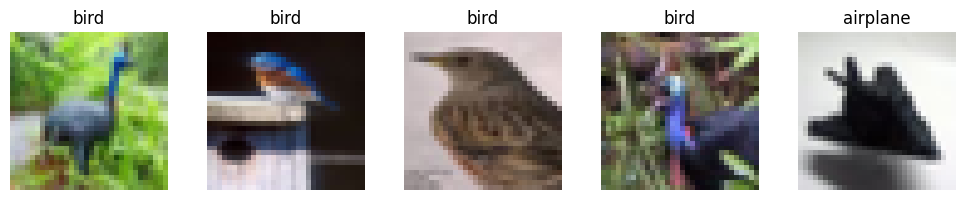

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Buscar índices de pajaros (2) y aviones (0)
indices = np.where((y_train == 0) | (y_train == 2))[0]

# Mostrar las primeras 5 imágenes de gatos/perros
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[idx])
    label = class_names[y_train[idx]]
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Convertimos a etiquetas binarias: avion = 0, pajaro = 1
y_train = (y_train == 2).astype(np.uint8) # true en 1 (pajaro) , false en 0 (avion).
y_test = (y_test == 2).astype(np.uint8)

In [15]:
type(X_train)

numpy.ndarray

In [16]:
len(X_train)

10000

In [17]:
X_train[0].shape

(32, 32, 3)

In [18]:
# Normalizamos las imágenes [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')

X_train shape: (10000, 32, 32, 3), y_train shape: (10000,)


In [20]:
model = Sequential([

    # Capa 1: Convolucional
    Conv2D(
        filters=32,               # 🧩 Número de filtros
        kernel_size=(3, 3),       # 📏 Tamaño del filtro (kernel)
        activation='relu',       # ⚡ Función de activación
        input_shape=(32, 32, 3)   # 📷 Tamaño de la imagen de entrada (alto, ancho, canales)
    ),

    # Capa 2: MaxPooling
    MaxPooling2D(
        pool_size=(2, 2)          # 🌀 Tamaño de la ventana de pooling (reducción de tamaño)
    ),

    # Capa 3: Convolucional
    Conv2D(
        filters=64,               # 🧩 Más filtros para capturar más patrones complejos
        kernel_size=(3, 3),       # 📏 Mismo tamaño de kernel
        activation='relu'        # ⚡ Activación ReLU
    ),

    # Capa 4: MaxPooling
    MaxPooling2D(
        pool_size=(2, 2)          # 🌀 Mismo tamaño de pooling
    ),

    # Capa 5: Aplanar los mapas de activación
    Flatten(),                   # 🔁 Convierte la salida 2D a un vector 1D

    # Capa 6: Densa (oculta)
    Dense(
        units=64,                # 🔢 Número de neuronas
        activation='relu'        # ⚡ Activación ReLU
    ),

    # Capa 7: Densa (salida)
    Dense(
        units=1,                 # 🔘 Clasificación binaria (0 o 1)
        activation='sigmoid'     # ✅ Activación Sigmoide para salida entre 0 y 1
    )
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(name='auc')])

model.summary()

/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-27 18:25:52.652807: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,977 (652.25 KB)

 Trainable params: 166,977 (652.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/20


2025-04-27 18:45:16.228793: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - auc: 0.7974 - loss: 0.5395 - val_auc: 0.9194 - val_loss: 0.3625
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - auc: 0.9116 - loss: 0.3783 - val_auc: 0.9362 - val_loss: 0.3500
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - auc: 0.9375 - loss: 0.3201 - val_auc: 0.9424 - val_loss: 0.3276
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - auc: 0.9479 - loss: 0.2934 - val_auc: 0.9473 - val_loss: 0.3076
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - auc: 0.9540 - loss: 0.2761 - val_auc: 0.9510 - val_loss: 0.2840
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - auc: 0.9604 - loss: 0.2565 - val_auc: 0.9527 - val_loss: 0.3480
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9669 - loss: 0.2346 - val_auc: 0.9558 - val_loss: 0.2711
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - auc: 0.9693 - loss: 0.2253 - val_auc: 0.9545 - val_loss: 0.2722
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - a

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
AUC Score: 0.9597


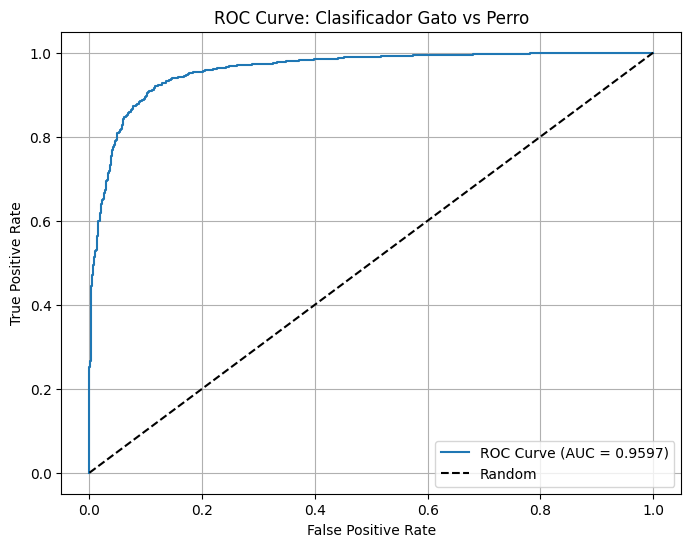

In [24]:
# Predicciones de probabilidad
y_proba = model.predict(X_test).flatten()

# Cálculo de la métrica AUC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Clasificador Gato vs Perro')
plt.legend()
plt.grid(True)
plt.show()